## Development of functions to use on Amazon Lambda for the article "Serverless ETL with Amazon Lambda"

In [10]:
import pandas as pd
import boto3
from datetime import datetime

### 1.1 Exploring Datasets to use on the article
The idea is to choose a dataset that can be use as 

In [12]:
df_sp500 = pd.read_csv('sandp500/all_stocks_5yr.csv', index_col='date')


In [13]:
df_sp500.info()

<class 'pandas.core.frame.DataFrame'>
Index: 619040 entries, 2013-02-08 to 2018-02-07
Data columns (total 6 columns):
open      619029 non-null float64
high      619032 non-null float64
low       619032 non-null float64
close     619040 non-null float64
volume    619040 non-null int64
Name      619040 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 33.1+ MB


In [15]:
df_sp500.loc['2013-02-08']

,open,high,low,close,volume,Name
date,,,,,,
2013-02-08,15.0700,15.1200,14.6300,14.7500,8407500,AAL
2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
2013-02-08,78.3400,79.7200,78.0100,78.9000,1298137,AAP
2013-02-08,36.3700,36.4200,35.8250,36.2500,13858795,ABBV
2013-02-08,46.5200,46.8950,46.4600,46.8900,1232802,ABC
...,...,...,...,...,...,...
2013-02-08,27.0100,27.6400,27.0100,27.0900,1206284,XYL
2013-02-08,63.7000,65.4900,63.6600,65.3000,7190051,YUM
2013-02-08,75.0200,75.9900,74.9600,75.8500,911179,ZBH


### Testing Quandl API
The idea is to test if Quandl can offer us the information from SP500 based on date.

In [22]:
quandl.ApiConfig.api_key = 'vwJ1pbGy7YbkB2gV8DGT'
data = quandl.get_table('MSFT', ticker = ['AAPL', 'MSFT', 'WMT'], 
                        qopts = { 'columns': ['ticker', 'date', 'adj_close'] }, 
                        date = { 'gte': '2015-12-31', 'lte': '2016-12-31' }, 
                        paginate=True)
data.head()

,ticker,date,adj_close
None,,,
0,WMT,2016-12-30,67.742045
1,WMT,2016-12-29,67.879254
2,WMT,2016-12-28,67.928257
3,WMT,2016-12-27,68.310482
4,WMT,2016-12-23,68.153672


In [66]:
quandl.ApiConfig.api_key = 'vwJ1pbGy7YbkB2gV8DGT'
data = quandl.get("EOD/MSFT", start_date="2019-09-01")
#, limit=1)
#, end_date="2019-09-02")
data

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,,,,,,,,


In [40]:
help(quandl.get)

Help on function get in module quandl.get:

get(dataset, **kwargs)
    Return dataframe of requested dataset from Quandl.
    :param dataset: str or list, depending on single dataset usage or multiset usage
            Dataset codes are available on the Quandl website
    :param str api_key: Downloads are limited to 50 unless api_key is specified
    :param str start_date, end_date: Optional datefilers, otherwise entire
           dataset is returned
    :param str collapse: Options are daily, weekly, monthly, quarterly, annual
    :param str transform: options are diff, rdiff, cumul, and normalize
    :param int rows: Number of rows which will be returned
    :param str order: options are asc, desc. Default: `asc`
    :param str returns: specify what format you wish your dataset returned as,
        either `numpy` for a numpy ndarray or `pandas`. Default: `pandas`
    :returns: :class:`pandas.DataFrame` or :class:`numpy.ndarray`
    Note that Pandas expects timeseries data to be sorte

In [59]:
data.tail()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2018-03-27,94.94,95.139,88.51,89.47,53704562.0,0.0,1.0,94.94,95.139,88.51,89.47,53704562.0


In [70]:
df = quandl.get_table("WIKI/PRICES", ticker = ["MSFT"], 
                      qopts = {"columns": ["date", "ticker", "adj_open", "adj_close"]}, 
                      paginate=True)

In [71]:
df

,date,ticker,adj_open,adj_close
None,,,,
0,2018-03-27,MSFT,94.940000,89.470000
1,2018-03-26,MSFT,90.610000,93.780000
2,2018-03-23,MSFT,89.500000,87.180000
3,2018-03-22,MSFT,91.265000,89.790000
4,2018-03-21,MSFT,92.930000,92.480000
...,...,...,...,...
8071,1986-03-19,MSFT,0.066454,0.065298
8072,1986-03-18,MSFT,0.068187,0.066454
8073,1986-03-17,MSFT,0.067031,0.068187


In [67]:
data = quandl.get_table('MER/F1', paginate=True)


In [69]:
data.sort_values(by='reportdate', axis=0, ascending=False)

,compnumber,reportid,mapcode,amount,reportdate,reporttype,auditorstatus,currency,consolidated,longname,...,city,statecode,country,zipcode,phonenumber,faxnumber,website,fye,indicator,statement
None,,,,,,,,,,,,,,,,,,,,,
15358,12760,1623720960,-966,1.554156e+01,2015-12-31,Q4,N,DKK,True,Novo-Nordisk AS,...,Bagsvaerd,None,DNK,DK-2880,(45) 4444 8888,(45) 4449 0555,www.novonordisk.com,2018-12-31,Net Current Assets as % of Total Assets,Derived
14128,86699,1623719936,-4023,9.280000e+00,2015-12-31,A,N,USD,True,RenaissanceRe Holdings Ltd.,...,Pembroke,None,BMU,HM 19,(1) 441 2954513,(1) 441 2959453,www.renre.com,2018-12-31,EPS - Net Income - Diluted,Income Statement
14138,86699,1623720960,-6159,2.041510e-01,2015-12-31,Q4,N,USD,True,RenaissanceRe Holdings Ltd.,...,Pembroke,None,BMU,HM 19,(1) 441 2954513,(1) 441 2959453,www.renre.com,2018-12-31,Total Debt to Equity,Derived
14137,86699,1623720960,-1368,6.293087e+00,2015-12-31,Q4,N,USD,True,RenaissanceRe Holdings Ltd.,...,Pembroke,None,BMU,HM 19,(1) 441 2954513,(1) 441 2959453,www.renre.com,2018-12-31,Calculated Tax Rate,Derived
14136,86699,1623720960,-4023,2.090000e+00,2015-12-31,Q4,N,USD,True,RenaissanceRe Holdings Ltd.,...,Pembroke,None,BMU,HM 19,(1) 441 2954513,(1) 441 2959453,www.renre.com,2018-12-31,EPS - Net Income - Diluted,Income Statement
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23259,15544,1504051200,-6159,3.266584e+00,2010-12-31,A,N,GBP,True,Royal Bank of Scotland Group Plc,...,Edinburgh,None,GBR,EH12 1HQ,(44) 131 626 0000,(44) 131 626 3081,www.rbs.com,2018-12-31,Total Debt to Equity,Derived
23258,15544,1504051200,-1766,2.707600e-02,2010-12-31,A,N,GBP,True,Royal Bank of Scotland Group Plc,...,Edinburgh,None,GBR,EH12 1HQ,(44) 131 626 0000,(44) 131 626 3081,www.rbs.com,2018-12-31,Total Asset Turnover,Derived
23257,15544,1504051200,-4023,-5.000000e-02,2010-12-31,A,N,GBP,True,Royal Bank of Scotland Group Plc,...,Edinburgh,None,GBR,EH12 1HQ,(44) 131 626 0000,(44) 131 626 3081,www.rbs.com,2018-12-31,EPS - Net Income - Diluted,Income Statement


In [14]:
from datetime import datetime
from concurrent import futures

import pandas as pd
from pandas import DataFrame
import pandas_datareader.data as web

def download_stock(stock):
    #try to query the iex for a stock, if failed note with print 
    try:
        print(stock)
        stock_df = web.DataReader(stock,'iex', start_time, now_time)
        stock_df['Name'] = stock
        output_name = stock + '_data.csv'
        stock_df.to_csv(output_name)
    except:
        bad_names.append(stock)
        print('bad: %s' % (stock))

""" set the download window """
now_time = datetime.now()
start_time = datetime(now_time.year - 5, now_time.month , now_time.day)

In [17]:
""" list of s_anp_p companies """
s_and_p = ['MMM','ABT','ABBV','ACN','ATVI','AYI','ADBE','AMD','AAP','AES','AET',
'AMG','AFL','A','APD','AKAM','ALK','ALB','ARE','ALXN','ALGN','ALLE',
'AGN','ADS','LNT','ALL','GOOGL','GOOG','MO','AMZN','AEE','AAL','AEP',
'AXP','AIG','AMT','AWK','AMP','ABC','AME','AMGN','APH','APC','ADI','ANDV',
'ANSS','ANTM','AON','AOS','APA','AIV','AAPL','AMAT','APTV','ADM','ARNC',
'AJG','AIZ','T','ADSK','ADP','AZO','AVB','AVY','BHGE','BLL','BAC','BK',
'BAX','BBT','BDX','BRK.B','BBY','BIIB','BLK','HRB','BA','BWA','BXP','BSX',
'BHF','BMY','AVGO','BF.B','CHRW','CA','COG','CDNS','CPB','COF','CAH','CBOE',
'KMX','CCL','CAT','CBG','CBS','CELG','CNC','CNP','CTL','CERN','CF','SCHW',
'CHTR','CHK','CVX','CMG','CB','CHD','CI','XEC','CINF','CTAS','CSCO','C','CFG',
'CTXS','CLX','CME','CMS','KO','CTSH','CL','CMCSA','CMA','CAG','CXO','COP',
'ED','STZ','COO','GLW','COST','COTY','CCI','CSRA','CSX','CMI','CVS','DHI',
'DHR','DRI','DVA','DE','DAL','XRAY','DVN','DLR','DFS','DISCA','DISCK','DISH',
'DG','DLTR','D','DOV','DWDP','DPS','DTE','DRE','DUK','DXC','ETFC','EMN','ETN',
'EBAY','ECL','EIX','EW','EA','EMR','ETR','EVHC','EOG','EQT','EFX','EQIX','EQR',
'ESS','EL','ES','RE','EXC','EXPE','EXPD','ESRX','EXR','XOM','FFIV','FB','FAST',
'FRT','FDX','FIS','FITB','FE','FISV','FLIR','FLS','FLR','FMC','FL','F','FTV',
'FBHS','BEN','FCX','GPS','GRMN','IT','GD','GE','GGP','GIS','GM','GPC','GILD',
'GPN','GS','GT','GWW','HAL','HBI','HOG','HRS','HIG','HAS','HCA','HCP','HP','HSIC',
'HSY','HES','HPE','HLT','HOLX','HD','HON','HRL','HST','HPQ','HUM','HBAN','HII',
'IDXX','INFO','ITW','ILMN','IR','INTC','ICE','IBM','INCY','IP','IPG','IFF','INTU',
'ISRG','IVZ','IQV','IRM','JEC','JBHT','SJM','JNJ','JCI','JPM','JNPR','KSU','K','KEY',
'KMB','KIM','KMI','KLAC','KSS','KHC','KR','LB','LLL','LH','LRCX','LEG','LEN','LUK',
'LLY','LNC','LKQ','LMT','L','LOW','LYB','MTB','MAC','M','MRO','MPC','MAR','MMC','MLM',
'MAS','MA','MAT','MKC','MCD','MCK','MDT','MRK','MET','MTD','MGM','KORS','MCHP','MU',
'MSFT','MAA','MHK','TAP','MDLZ','MON','MNST','MCO','MS','MOS','MSI','MYL','NDAQ',
'NOV','NAVI','NTAP','NFLX','NWL','NFX','NEM','NWSA','NWS','NEE','NLSN','NKE','NI',
'NBL','JWN','NSC','NTRS','NOC','NCLH','NRG','NUE','NVDA','ORLY','OXY','OMC','OKE',
'ORCL','PCAR','PKG','PH','PDCO','PAYX','PYPL','PNR','PBCT','PEP','PKI','PRGO','PFE',
'PCG','PM','PSX','PNW','PXD','PNC','RL','PPG','PPL','PX','PCLN','PFG','PG','PGR',
'PLD','PRU','PEG','PSA','PHM','PVH','QRVO','PWR','QCOM','DGX','RRC','RJF','RTN','O',
'RHT','REG','REGN','RF','RSG','RMD','RHI','ROK','COL','ROP','ROST','RCL','CRM','SBAC',
'SCG','SLB','SNI','STX','SEE','SRE','SHW','SIG','SPG','SWKS','SLG','SNA','SO','LUV',
'SPGI','SWK','SBUX','STT','SRCL','SYK','STI','SYMC','SYF','SNPS','SYY','TROW','TPR',
'TGT','TEL','FTI','TXN','TXT','TMO','TIF','TWX','TJX','TMK','TSS','TSCO','TDG','TRV',
'TRIP','FOXA','FOX','TSN','UDR','ULTA','USB','UAA','UA','UNP','UAL','UNH','UPS','URI',
'UTX','UHS','UNM','VFC','VLO','VAR','VTR','VRSN','VRSK','VZ','VRTX','VIAB','V','VNO',
'VMC','WMT','WBA','DIS','WM','WAT','WEC','WFC','HCN','WDC','WU','WRK','WY','WHR','WMB',
'WLTW','WYN','WYNN','XEL','XRX','XLNX','XL','XYL','YUM','ZBH','ZION','ZTS']

In [73]:
### Try Alpha Vantage API


In [77]:
from alpha_vantage.timeseries import TimeSeries
import matplotlib.pyplot as plt
import sys

def stockchart(symbol):
    ts = TimeSeries(key='your_key', output_format='pandas')
    data, meta_data = ts.get_intraday(symbol=symbol,interval='1min', outputsize='full')
    print(data)
    data['4. close'].plot()
    plt.title('Stock chart')
    plt.show()

#symbol=raw_input("Enter symbol name:")
#stockchart(symbol)

                      1. open   2. high    3. low  4. close  5. volume
date                                                                  
2019-10-30 14:43:00  143.7100  143.7100  143.5600  143.5700    55877.0
2019-10-30 14:42:00  143.6294  143.7399  143.5900  143.7100    62335.0
2019-10-30 14:41:00  143.5400  143.6400  143.5200  143.6100    38942.0
2019-10-30 14:40:00  143.6800  143.6800  143.4400  143.5100    67754.0
2019-10-30 14:39:00  143.7500  143.7950  143.6400  143.6850    40592.0
...                       ...       ...       ...       ...        ...
2019-10-24 09:35:00  139.5223  139.6773  139.5223  139.6773   458471.0
2019-10-24 09:34:00  139.5700  139.5700  139.5700  139.5700   481176.0
2019-10-24 09:33:00  139.2400  139.5095  139.1291  139.3750   440304.0
2019-10-24 09:32:00  138.8500  139.3400  138.7400  139.2300   512881.0
2019-10-24 09:31:00  139.3900  139.5000  138.8100  138.8505  2035543.0

[1865 rows x 5 columns]


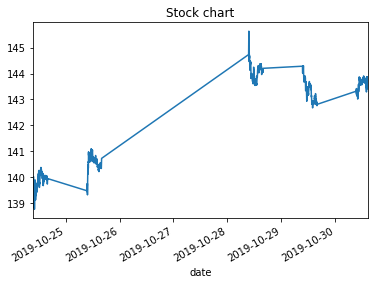

In [78]:
stockchart('MSFT')

In [85]:
from alpha_vantage.timeseries import TimeSeries
import matplotlib.pyplot as plt

ts = TimeSeries(key='YOUR_API_KEY', output_format='pandas')
data, meta_data = ts.get_daily(symbol='MSFT', outputsize='full')

In [86]:
data

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2019-10-30,143.520,143.910,142.790,143.800,10627789.0
2019-10-29,144.080,144.500,142.650,142.830,17241893.0
2019-10-28,144.400,145.670,143.510,144.190,35243000.0
2019-10-25,139.340,141.140,139.200,140.730,25274600.0
2019-10-24,139.390,140.420,138.670,139.940,37029300.0
...,...,...,...,...,...
1999-11-05,91.813,92.875,90.500,91.563,70167400.0
1999-11-04,92.313,92.750,90.313,91.750,54239400.0
1999-11-03,92.938,93.500,91.500,92.000,44517000.0


In [83]:
help(TimeSeries)

Help on class TimeSeries in module alpha_vantage.timeseries:

class TimeSeries(alpha_vantage.alphavantage.AlphaVantage)
 |  TimeSeries(key=None, output_format='json', treat_info_as_error=True, indexing_type='date', proxy=None)
 |  
 |  This class implements all the api calls to times series
 |  
 |  Method resolution order:
 |      TimeSeries
 |      alpha_vantage.alphavantage.AlphaVantage
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  get_batch_stock_quotes(self, symbols)
 |      Return multiple stock quotes with a single request.
 |      It raises ValueError when problems arise
 |      
 |      Keyword Arguments:
 |          symbols:  A tuple or list Sof symbols to query
 |  
 |  get_daily(self, symbol, outputsize='compact')
 |      Return daily time series in two json objects as data and
 |      meta_data. It raises ValueError when problems arise
 |      
 |      Keyword Arguments:
 |          symbol:  the symbol for the equity we want to get its data
 |          ou

In [79]:
data['close'].plot()
plt.title('Intraday Times Series for the MSFT stock (1 min)')
plt.show()

KeyError: 'close'